In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1', index_col = 'object_id')

In [3]:
df_engagement = pd.read_csv('takehome_user_engagement.csv')

In [4]:
df_users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
#find the range of time covered
print('Range of time: ' + df_engagement['time_stamp'].min() + ' to ' + df_engagement['time_stamp'].max())

Range of time: 2012-05-31 08:20:06 to 2014-06-06 14:58:50


In [7]:
#find users who interacted multiple times in 7 days
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])
df_engagement['counts'] = df_engagement.groupby(['user_id', pd.Grouper(freq='7d', key='time_stamp')]).cumcount()

In [8]:
df_engagement.head(20)

,time_stamp,user_id,visited,counts
0,2014-04-22 03:53:30,1,1,0
1,2013-11-15 03:45:04,2,1,0
2,2013-11-29 03:45:04,2,1,0
3,2013-12-09 03:45:04,2,1,0
4,2013-12-25 03:45:04,2,1,0
5,2013-12-31 03:45:04,2,1,0
6,2014-01-08 03:45:04,2,1,0
7,2014-02-03 03:45:04,2,1,0
8,2014-02-08 03:45:04,2,1,0
9,2014-02-09 03:45:04,2,1,1


In [9]:
#create list of users who adopted the service
adopted = []
for index, row in df_engagement.iterrows():
    if (row['counts'] >= 2) and (row['user_id'] not in adopted):
        adopted.append(row['user_id'])

In [10]:
#create column with boolean adopted
df_users['adopted'] = False
for i in adopted:
    df_users.set_value(i,'adopted', True)

In [11]:
df_users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [12]:
print(df_users.count())
df_users[df_users['adopted'] == True].count()

creation_time                 12000
name                          12000
email                         12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
adopted                       12000
dtype: int64


creation_time                 1439
name                          1439
email                         1439
creation_source               1439
last_session_creation_time    1439
opted_in_to_mailing_list      1439
enabled_for_marketing_drip    1439
org_id                        1439
invited_by_user_id             828
adopted                       1439
dtype: int64

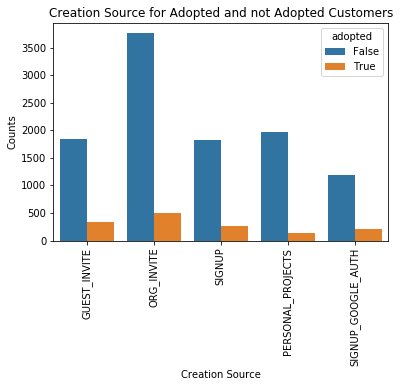

In [13]:
#plot categorical variables to see if anything correlates to customers adopting the service
sns.countplot(x='creation_source', data = df_users, hue = 'adopted')
plt.title('Creation Source for Adopted and not Adopted Customers')
plt.xlabel('Creation Source')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()

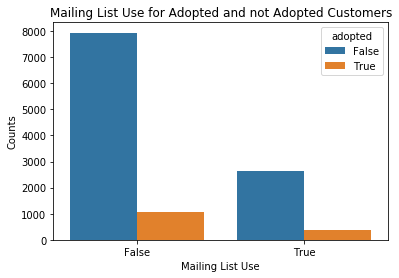

In [14]:
sns.countplot(x='opted_in_to_mailing_list', data = df_users, hue = 'adopted')
plt.title('Mailing List Use for Adopted and not Adopted Customers')
plt.xlabel('Mailing List Use')
plt.ylabel('Counts')
plt.xticks([0,1], ['False','True'])
plt.show()

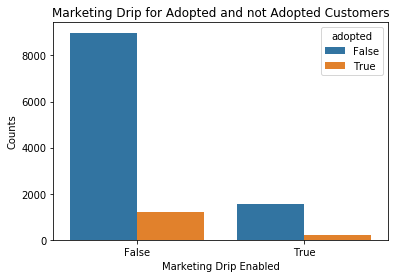

In [15]:
sns.countplot(x='enabled_for_marketing_drip', data = df_users, hue = 'adopted')
plt.title('Marketing Drip for Adopted and not Adopted Customers')
plt.xlabel('Marketing Drip Enabled')
plt.xticks([0,1], ['False','True'])
plt.ylabel('Counts')
plt.show()

In [16]:
#see if there is a correlation between status of recommender and user
df_users['adopted_inviter'] = False
for a in adopted:
    idx = df_users.index[df_users['invited_by_user_id'] == a].tolist()
    for i in idx:
        df_users.set_value(i,'adopted_inviter', True)

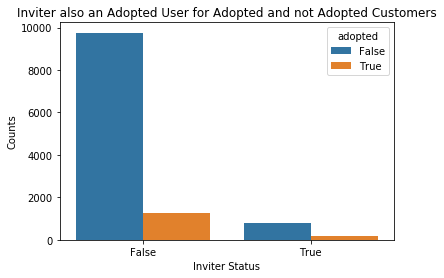

In [17]:
sns.countplot(x='adopted_inviter', data = df_users, hue = 'adopted')
plt.title('Inviter also an Adopted User for Adopted and not Adopted Customers')
plt.xlabel('Inviter Status')
plt.ylabel('Counts')
plt.xticks([0,1], ['False','True'])
plt.show()

In [18]:
#use feature importance from a random forest classifier

In [19]:
#fill invited_by_user_id with 0 if they were not recommended by a user
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)
df_users = df_users.dropna()
df_users.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,8.823000e+03,8823.000000,8823.000000,8823.000000,8823.000000
mean,1.379279e+09,0.252295,0.151989,142.572254,3237.316786
std,1.953116e+07,0.434354,0.359031,124.176422,3888.088044
min,1.338452e+09,0.000000,0.000000,0.000000,0.000000
25%,1.363195e+09,0.000000,0.000000,30.000000,0.000000
50%,1.382888e+09,0.000000,0.000000,109.000000,1055.000000
75%,1.398443e+09,1.000000,0.000000,239.000000,6405.000000
max,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = df_users[['creation_source', 'creation_time', 'last_session_creation_time',
             'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
             'invited_by_user_id', 'adopted_inviter']]
y = df_users['adopted']

le = LabelEncoder()
X['creation_source'] = le.fit_transform(X['creation_source'])
X['opted_in_to_mailing_list'] = le.fit_transform(X['opted_in_to_mailing_list'])
X['enabled_for_marketing_drip'] = le.fit_transform(X['enabled_for_marketing_drip'])
X['adopted_inviter'] = le.fit_transform(X['adopted_inviter'])

X['creation_time'] = pd.to_datetime(X['creation_time'])
X['creation_time'] = pd.to_numeric(X['creation_time'])

In [21]:
forest = RandomForestClassifier(n_estimators = 200, random_state=0)

forest.fit(X,y)
importance = forest.feature_importances_
importance_labels = ['creation_source', 'creation_time', 'last_session_creation_time',
             'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
             'invited_by_user_id', 'adopted_inviter']

print('Feature ranking:')

for f in range(X.shape[1]):
    print('{:s} ({:.3f})'.format(importance_labels[f], importance[f]))

Feature ranking:
creation_source (0.011)
creation_time (0.228)
last_session_creation_time (0.648)
opted_in_to_mailing_list (0.005)
enabled_for_marketing_drip (0.004)
org_id (0.061)
invited_by_user_id (0.039)
adopted_inviter (0.004)


[0.010726   0.22799825 0.64827031 0.00489517 0.00421487 0.06125832
 0.0385388  0.00409828]


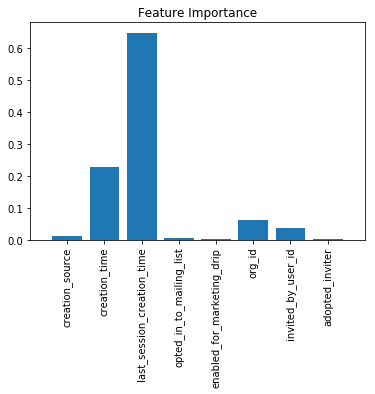

In [22]:
print(importance)
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance, align="center")
plt.xticks(range(X.shape[1]), importance_labels, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.show()